In [3]:
import numpy as np
import pandas as pd
data = pd.Series([1,3,5,5],index = ['a','b','c','d'])
# 'a' in data
# list(data.items())
# 用字典表达式和方法来查看键/索引
# data.keys()
# 用values属性来查看值
# data.values
# list(data.items()))
# # population_dict={'California':38332521,'Texas':26448193,'New York':12344566,'Florida':4566777,'Illionis':2345567}
# population = pd.Series(population_dict)
# area_dict = {'California':423967,'Texas':65577,'New York':44566,'Florida':55676,'Illionis':987767}
# area = pd.Series(area_dict)
# t = pd.DataFrame({'population
# ':population,'area':area})
# print(t.area)
# 

In [ ]:
import numpy as np
import pandas as pd
a=np.array([[1,2,3],[4,5,6]])
b = np.append(a,[[1,2,3],[2,3,4]],axis=1)
c = np.append(a,[[1,2,3],[6,7,8],[4,5,7],[0,9,8]],axis=0)

In [ ]:
import numpy as py 
import pandas as pd# 生成一个仅在rng变量使用在的伪随机数
rng = np.random.RandomState(42)
# 创建一个取值位于[0,10)区间的长度的为4的一维数组
ser = pd.Series(rng.randint(0,10,4))
# print(ser)
df = pd.DataFrame(rng.randint(0,10,size=(3,4)),columns=list('ABCD'))
# np.exp(ser)
area = pd.Series({'Alasa':234566,'Texas':98776,'Cafornia':8769766},name='area')
population = pd.Series({'Cafornia':567655,'Texas':5667678,'New York':5656454},name='population')
# population/area
# area.index|population.index
# A = pd.Series([1,2,3,4],index=[0,1,2,3])
# B = pd.Series([3,4,5,6],index=[1,2,3,4])
# # A+B
# 通过设置fill_value来设置自定义缺失值
# A.add(B,fill_value=0)
A = pd.DataFrame(rng.randint(0,20,(2,2)),columns=list('AB'))
# print(A)
# print( A.stack().mean())
B = pd.DataFrame(rng.randint(0,10,(3,3)),columns=list('BAC'))
# B
# 使用的A的平均值来设置缺失值
# 两个对象的行列索引可以是不同顺序的，结果的索引会自动对齐
# 通过stack()方法将二维数组压缩为一维数组，在求平均数
# fill = A.stack().mean()
# A.add(B,fill_value=fill)

# # DataFrame 与Series 的运算
# C = rng.randint(10,size=(3,4))
# print(C)
# print(C-C[0])
# df = pd.DataFrame(C,columns=list('QRST'))
# print(df-df.iloc[0])
# 列的计算
# print(df.sub(df['R'],axis=0))
# ra = df.iloc[0,::2]
# # df-ra


'''
缺失值的处理
padas提供一些方法来发现、剔除、替换数据结构中的缺失值
isnull()
notnull()
dropna()
fillna()

'''
# dropna()默认会剔除任何包含缺失值的行
# 也可以通过参数axis 指定按列剔除
# 通过参数how='any'或者how='all'来指定剔除任何包含nan的行或者列，或仅删除全部包含nan的行或者列


df = pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])
print(df)
# df.dropna()
df.dropna(axis=1)
# 填充缺失值fillna()方法，它会返回一个填充了缺失值的数组副本
# 通过设置参数method='ffill'或者method='bfill'进行从前往后填充（利用前值填充）或者从后往前填充,在DataFrame中还需设置axis
df.fillna(method='ffill',axis=1)
df.fillna(method='bfill',axis=0)
# 用不包含nan的行的平均值进行填充
f = df.iloc[1].mean()
df.fillna(f)

In [ ]:
# 多层索引
import numpy as np 
import pandas as pd
index = [('California',2000),('California',2010),('New York',2000),('New York',2010),('Texas',2000),('Texas',2010)]
population = [33871648,37253956,18976457,19378103,20852820,25145561]
pop = pd.Series(population,index=index)
index = pd.MultiIndex.from_tuples(index)
index
pop = pop.reindex(index)
pop
pop[:,2000]
# unstack()方法可以将一个多级索引的Series转换为普通索引的DataFrame
pop_df = pop.unstack()
pop_df
# stack()方法可以快速将一个DataFrame 转换为一个带有多级索引的Series
pop_df.stack()
# 通过多层索引可以使用DataFrame和Series表示更高维度的数据
# 增加一维数据，各州18岁以下的人口数据
pop_df  = pd.DataFrame({'total':pop,'under18':[9267089,9284094,4687374,4318033,5906301,6879014]})
pop_df
# 计算18岁以下人口占该州总人口的比例
df18 = pop_df['under18']/pop_df['total']   #得到的是一个带有多层索引的Series
# 将带有多层索引的Series转化为DataFrame
df18.unstack()
'''
多级索引的创建方法
在创建Series和DataFrame时可以将构建的多级索引对象作为index参数，在通过reindex方法，更新Series或DataFrame的索引
'''
# 第一种，直接将index参数设置为至少二维的索引数组
df = pd.DataFrame(np.random.rand(4,2),index=[['a','a','b','b'],[1,2,1,2]],columns=['data1','data2'])
df
# 第二种，通过将元组作为键的字典传给Pandas,pandas会默认转换为MultiIndex
data = {('Cali',2000):56677889,('Cali',2010):445666778,('Taxa',2000):4456677,('New',2000):44556788,('Texa',2010):4868686,('New',2010):47858766}
pd.Series(data)
# 第三种通过pd.MultiIndex中的类方法来实现
# 1.通过一个有不同等级的若干简单数组组成的列表来构建MultiIndex
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])
# 2.通过包含多个索引值的元组构成的列表来创建MultiIndex
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2)])
# 3.通过两个索引的笛卡尔积来创建MultiIndex
pd.MultiIndex.from_product([['a','b'],[1,2]])
# 4.通过提供levels和labels来创建MultiIndex
# pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
#            labels=[[0, 0, 1, 1], [0, 1, 0, 1]])
# 在创建Series和DataFrame时可以将这些构建的多级索引对象作为index参数，在通过reindex方法，更新Series或DataFrame的索引
# reindex()方法，默认对行索引进行重置，添加columns=新索引可以对列操作，使用该方法，索引名相同的行/列索引会进行重置，新的行索引名，其对应的数据行会用NaN填充
# 通过指定method参数，method=ffill或bfill进行前值/后值填充
# 设置新索引可以使用set_index（）
df1 = pd.DataFrame(np.random.rand(4,6),index=[['c','c','b','b'],[1,2,1,2]])
df1
f=pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])
df1.reindex(f)
# 通过set_index()设置全新的索引
df1.set_index(f)
pop.index.names=['state','year']
pop

# 多级列索引
# 多级行列索引
index = pd.MultiIndex.from_product([[2013,2014],[1,2]],names=['year','visit'])
columns = pd.MultiIndex.from_product([['Bob','Lisa','Tom'],['HR','Temp']],names=['subject','type'])
# 模拟数据
data =np.round(np.random.randn(4,6),1)
# print(data)
data[:,::2] *=10

data +=37
# 创建DataFrame
health_data = pd.DataFrame(data,index=index,columns=columns)
# print(health_data)
health_data['Lisa','HR']
health_data.iloc[:3,:2]
health_data.loc[:,'Lisa']


# 多级索引的取值与切片
# 1、Series多级索引,以下方法默认行的操作
# print(pop)
pop['California',2010]
pop['Texas']
pop['California':'New York']
# 如果索引已经排序，可以使用较低级的索引取值，第一层可以使用空切片
pop[:,2010]
# 通过布尔掩码取数据
pop[pop>22000000]
# 花哨的索引取值
pop.loc[['California','Texas'],2010]
pop.iloc[1:6:4]
# 2、DataFrame多级索引，DataFrame的多层索引的用法跟Series相似，Series用法到DataFrame中就应用到了列上
# print(health_data)
health_data['Bob','HR']
health_data.iloc[:2,:2]
# 在loc跟iloc中传递多个层级的索引元组
health_data.loc[:,('Lisa','HR')]
# 与上面结果不同
health_data.loc[:,['Lisa','HR']]
# pandas中处理DataFrame多层索引切片最棒的方法，使用IndexSlice方法
idx = pd.IndexSlice
health_data.loc[idx[:,1],idx[:,'HR']]
# 随机取数还是需要使用切片，比如各行/列取值
health_data.ix[0:4:3,('Lisa','HR')]
health_data.iloc[0:4:3,0:7:3]
health_data.iloc[0:4:3,0:5:3]
health_data.loc[idx[:,1],idx['Bob':'Lisa','HR']]
health_data.loc[(2013,1):(2014,2):3,('Lisa','HR')]
health_data.loc[(2013,1):(2014,2):3,('Bob','HR'):('Lisa','Temp'):3]


# 多级索引的行列转换
index = pd.MultiIndex.from_product([['a','c','b'],[1,2]])
data = pd.Series(np.random.rand(6),index=index)
data.index.names=['char','int']
data
# 因为MlultiIndex是无序排列的，局部切片和许多类似的操作都要求MUltiIndex的各级时有序的。下面的例子会报错
# data['a':'b']
# sort_index()和sort_level()可以进行排序
data = data.sort_index()
data
data['a':'b']
# 索引stack与unstack 通过level参数设置转换的===索引层级==，stack与unstack是逆操作，同时使用两种方法数据保持不变
pop
pop1 = pop.unstack(level=0)  


# 索引的设置与重置
# 层级数据维度转换的另一中方法是===行列标签转换==，可以通过reset_index()方法实现,Series使用该方法返回的结果是一个DataFrame
# print(pop)
pop_falt = pop.reset_index(name='population')
print(pop_falt)
pop_falt.loc[1,'year']
# 通过DataFrame的set_index()方法将原有数据的列直接转换为MultiIndex类型，返回结果是一个带多级索引的DataFrame.
pop_falt1=pop_falt.set_index(['state','year'])
print(pop_falt1)
# pop_falt.index.values

In [ ]:
# 多层索引
import numpy as py 
import pandas as pd
f=pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])
df1 = pd.DataFrame(np.random.rand(4,6),index=[['c','c','d','d'],[1,2,1,2]])
df1=df1.set_index(f)
df1

In [ ]:
# 多层索引
import numpy as py 
import pandas as pd
index = [('California',2000),('California',2010),('New York',2000),('New York',2010),('Texas',2000),('Texas',2010)]
population = [33871648,37253956,18976457,19378103,20852820,25145561]
pop = pd.Series(population,index=index)
pop
index = pd.MultiIndex.from_tuples(index)
index
pop = pop.reindex(index)
pop

In [ ]:
import numpy as np
import pandas as pd
s = pd.Series([np.nan, 1, np.nan, np.nan, 2, np.nan],list('aaabcd')) #连续出现的缺失，最多填充一次
s


In [ ]:
# 第一章预备知识
# python基础
# 1、生成一个数字序列
# 新建一个空列表
L = []
def my_func(x):
    return 2*x
for i in range(5):
    L.append(my_func(i))
L
# 可以利用列表推导式进行写法上的简化： [* for i in *] 。其中，第一个 * 为映射函数，其输入为后面 i 指代的内容，第二个 * 表示迭代的对象。
[my_func(i) for i in range(5)]
# 列表表达式多层嵌套,如下面的例子中第一个 for 为外层循环，第二个为内层循环：
[m+'@'+n for m in ['a','b'] for n in ['c','d']]
# 除了列表推导式，另一个实用的语法糖是带有 if 选择的条件赋值，其形式为 value = a if condition else b ：
value = 'cat' if 2>1 else 'dog'
value
# 上面写法等价于下面写法
a, b = 'cat', 'dog'
condition = 2 > 1 # 此时为True
if condition:
    value = a
else:
    value = b
# 下面举一个例子，截断列表中超过5的元素，即超过5的用5代替，小于5的保留原来的值：
Q = [1,2,3,4,5,6,7,8,9]
L = []
for val in Q:
    val = val if val <=5 else 5
    L.append(val)
L
# 正确的使用列表推导式的方法
[i if i<=5 else 5 for i in Q]


# 2、匿名函数与map方法

my_func = lambda x:2*x
my_func(3)
my_func1 = lambda a,b :a+b
my_func1(1,2)
# 但上面的用法其实违背了“匿名”的含义，事实上它往往在无需多处调用的场合进行使用，例如上面列表推导式中的例子，用户不关心函数的名字，只关心这种映射的关系：
[(lambda x:2*x)(i) for i in range(5)]
# 对于上述的这种列表推导式的匿名函数映射， Python 中提供了 map 函数来完成，它返回的是一个 map 对象，需要通过 list 转为列表
list(map(lambda x:2*x,range(5)))
# 对于多个输入值的函数映射，可以通过追加迭代对象实现：
list(map(lambda x,y: str(x)+'@'+y,range(5),list('abcd')))


# 3、zip对象与enumerate方法
# zip函数能够把多个可迭代对象打包成一个元组构成的可迭代对象，它返回了一个 zip 对象，通过 tuple, list 可以得到相应的打包结果：
L1,L2,L3 = list('abc'),list('cde'),list('fgh')
list(zip(L1,L2,L3))
tuple(zip(L1,L2,L3))
# 往往会在循环迭代的时候使用到 zip 函数：
for i,f,k in zip(L1,L2,L3):
    print(i,f,k)
# enumerate 是一种特殊的打包，它可以在迭代时绑定迭代元素的遍历序号：
L = list('asdf')
for index,value in enumerate(L):
    print(index,value)

# 当需要对两个列表建立字典映射时，可以利用 zip 对象：
dict(zip(L1,L2))
# 既然有了压缩函数，那么 Python 也提供了 * 操作符和 zip 联合使用来进行解压操作：
ziped = list(zip(L1,L2,L3))
ziped
list(zip(*ziped))   #三个元组分别对应原来的列表

In [ ]:
# numpy基础
# 1、np数组的构造
 # 最一般的方法是通过 array 来构造：
import numpy as np 
np.array([1,2,3])
# 下面讨论一些特殊数组的生成方式：
# 【a】等差序列： np.linspace, np.arange
np.linspace(1,5,15)      #起始  终止（包含即闭区间） 样本个数
np.arange(1,5,2)     #起始 终止（不包含即前闭后开区间） 步长

# 【b】特殊矩阵： zeros, eye, full
np.zeros((2,3))   #传入元组表示个维度（行列）大小
np.eye(3)    #3*3单位矩阵
np.eye(3,k=1)  #偏移主对角线一个单位的伪单位矩阵
np.full((2,3),10)  #传入元组表示维度大小，10表示填充数值
np.full((2,3),[1,2,3])  #每行传入相同的列表
np.full((2,3),[[1,2,3],[4,5,6]])

# 【c】随机矩阵： np.random
# 最常用的随机生成函数为 rand, randn, randint, choice ，它们分别表示0-1均匀分布的随机数组、标准正态的随机数组、随机整数组和随机列表抽样：
np.random.rand(3)   #生成服从0-1 均匀分布的三个随机数
np.random.rand(3,3)   # 注意这里传入的不是元组，每个维度大小分开输入

# 对于服从区间 𝑎 到 𝑏 上的均匀分布可以如下生成：
a,b = 5,15
(b-a)* np.random.rand(3,3) + a
# 一般的，可以选择已有的库函数：
np.random.uniform(5,15,(3,3))

# randn 生成了 𝑁(0,𝐈) 的标准正态分布：
np.random.randn(3)
np.random.randn(5,6)
# 对于服从方差为 𝜎2 均值为 𝜇 的一元正态分布可以如下生成：
sigma,mu  = 2.5,3
mu+np.random.randn(3) * sigma

# 同样的，也可选择从已有函数生成：
np.random.normal(3,2.5,3)

# randint 可以指定生成随机整数的最小值最大值（不包含即前闭后开区间）和维度大小：
np.random.randint(5,15,(3,3))   #生成5-14之间的随机整数，维度为3*3
low,high,size = 5,15,(3,3)
np.random.randint(low,high,size)

# choice 可以从给定的列表中，以一定概率和方式抽取结果，当不指定概率时为均匀采样，默认抽取方式为有放回抽样
my_list = list('abcd')
np.random.choice(my_list, 2, replace=False, p=[0.1, 0.7, 0.1 ,0.1])
np.random.choice(my_list,(3,3))
# 当返回的元素个数与原列表相同时，不放回抽样等价于使用 permutation 函数，即打散原列表：
np.random.permutation(my_list)
# 最后，需要提到的是随机种子，它能够固定随机数的输出结果：
np.random.seed(0)
np.random.rand()

np.random.seed(0)
np.random.rand()


# 2、np数组的变形与合并

# 【a】转置 T
np.zeros((3,2)).T
# 【b】合并操作 r_ , c_
# 对于二维数组而言，r_,c_分别表示上下合并和左右合并
np.r_[np.zeros((3,2)),np.zeros((3,2))]
np.c_[np.zeros((2,3)),np.zeros((2,3))]
# 一维数组和二维数组进行合并时，应当把其视作列向量，在长度匹配的情况下只能够使用左右合并的 c_ 操作：
np.r_[np.array([1,3]),np.zeros(2)]
np.c_[np.array([1,2,3,4]),np.zeros((4,4))]

# 【c】维度变换 reshape
# reshape 能够帮助用户把原数组按照新的维度重新排列。在使用时有两种模式，分别为 C 模式和 F 模式，分别以逐行和逐列的顺序进行填充读取
target = np.arange(8).reshape(4,2)
# print(target)
target.reshape((2,4),order='C')   #按行进行读取和填充
target.reshape((2,4),order='F')   #按列进行读取和填充
# 特别地，由于被调用数组的大小是确定的， reshape 允许有一个维度存在空缺，此时只需填充-1即可：
target.reshape((2,-1))

# 下面将 n*1 大小的数组转为1维数组的操作是经常使用的：
target = np.ones((3,1))
target
target.reshape(-1)

# 3、np数组的切片与索引 
# 数组的切片模式支持使用 slice 类型的 start:end:step 切片，还可以直接传入列表指定某个维度的索引进行切片：
target = np.arange(9).reshape(3,3)
target[:-1,[0,2]]
# 此外，还可以利用 np.ix_ 在对应的维度上使用布尔索引，但此时不能使用 slice 切片：
target[np.ix_([True,False,True],[True,False,True])]
target[np.ix_([0,2],[0,2])]
target[np.ix_([0,2],[True,False,True])]
# 当数组维度为1维时，可以直接进行布尔索引，而无需 np.ix_ ：
new = target.reshape(-1)
new[new%2==0]

# 4、常用函数
# 【a】where
# where是一种条件函数，可以指定满足条件和不满足条件时对应位置的填充值
a = np.array([1,0,-1,2])
np.where(a>0,a,5)
# 【b】 nonzero, argmax, argmin
# 这三个函数返回的都是索引， nonzero 返回非零数的索引， argmax, argmin 分别返回最大和最小数的索引：
np.nonzero(a)
np.argmax(a)
np.argmin(a)

# 【c】 any, all

# any 指当序列至少 存在一个 True 或非零元素时返回 True ，否则返回 False

# all 指当序列元素 全为 True 或非零元素时返回 True ，否则返回 False
a.any()
a.all()
# 【d】 cumprod, cumsum, diff

# cumprod, cumsum 分别表示累乘和累加函数，返回同长度的数组， diff 表示和前一个元素做差，由于第一个元素为缺失值，因此在默认参数情况下，返回长度是原数组减1
a = np.array([1,2,3])   
a.cumprod()   #1  1*2  1*2*3 
a.cumsum()    #1  1+2  1+2+3
np.diff(a)

# 【e】 统计函数

# 常用的统计函数包括 max, min, mean, median, std, var, sum, quantile ，其中分位数计算是全局方法，因此不能通过 array.quantile 的方法调用：
a.max()
a.min()
a.mean()

# 但是对于含有缺失值的数组，它们返回的结果也是缺失值，如果需要略过缺失值，必须使用 nan* 类型的函数，上述的几个统计函数都有对应的 nan* 函数。
a = np.array([1,np.nan,2,np.nan,5])
a
a.max()
np.nanmax(a)
np.nanmean(a)
# 对于协方差和相关系数分别可以利用 cov, corrcoef 如下计算：
a = np.array([1,2,4,5])
b = np.array([2,4,6,8])
np.cov(a,b)
np.corrcoef(a,b)
# 最后，需要说明二维 Numpy 数组中统计函数的 axis 参数，它能够进行某一个维度下的统计特征计算，当 axis=0 时结果为列的统计指标，当 axis=1 时结果为行的统计指标：
a = np.arange(9).reshape(3,3)
a.sum(0)
a.mean(1)

# 5. 广播机制

# 广播机制用于处理两个不同维度数组之间的操作，这里只讨论不超过两维的数组广播机制。

# 【a】标量和数组的操作

# 当一个标量和数组进行运算时，标量会自动把大小扩充为数组大小，之后进行逐元素操作：
res = 3*np.ones((2,2))+1
res
res = 1/res
res

# 【b】二维数组之间的操作

# 当两个数组维度完全一致时，使用对应元素的操作，否则会报错，除非其中的某个数组的维度是 𝑚×1
# 或者 1×𝑛 ，那么会扩充其具有 1 的维度为另一个数组对应维度的大小。例如， 1×2 数组和 3×2 数组做逐元素运算时会把第一个数组扩充为 3×2 ，扩充时的对应数值进行赋值。但是，需要注意的是，如果第一个数组的维度是 1×3 ，那么由于在第二维上的大小不匹配且不为 1 ，此时报错。
np.ones(3)
M1 = np.random.rand(2,3)
M2 = np.random.rand(3,4)
res = [[sum([M1[i][k] * M2[k][j] for k in range(3)]) for j in range(4)] for i in range(2 )]
(np.abs((M1@M2 - res) < 1e-15)).all()


In [ ]:
# 第二章 pandas 基础
import pandas as pd 
import numpy as np 
# 1、文件读取
df_excel = pd.read_excel('/Users/steven/Desktop/20年秋学期.xls')
df_excel

# 这里有一些常用的公共参数， header=None 表示第一行不作为列名， index_col 表示把某一列或几列作为索引，索引的内容将会在第三章进行详述， usecols 表示读取列的集合，默认读取所有的列， parse_dates 表示需要转化为时间的列，关于时间序列的有关内容将在第十章讲解， nrows 表示读取的数据行数。上面这些参数在上述的三个函数里都可以使用。
pd.read_excel('/Users/steven/Desktop/20年秋学期.xls',header=None,index_col=[1,2])
# pd.read_excel('/Users/steven/Desktop/20年秋学期.xls',parse_dates=9)
pd.read_excel('/Users/steven/Desktop/20年秋学期.xls',nrows=2)
pd.read_excel('/Users/steven/Desktop/20年秋学期.xls',usecols=[1,3,5,9])

# 在读取 txt 文件时，经常遇到分隔符非空格的情况， read_table 有一个分割参数 sep ，它使得用户可以自定义分割符号，进行 txt 数据的读取。例如，下面的读取的表以 |||| 为分割：
df_txt = pd.read_table('/Users/steven/Desktop/text1.txt')
df_txt
# 这时可以使用 sep，同时需要指定引擎为 python ： 
# pd.read_table('/Users/steven/Desktop/text1.txt',engine='python')有问题

# 2、文件写入
# 一般在数据写入中，最常用的操作是把 index 设置为 False ，特别当索引没有特殊意义的时候，这样的行为能把索引在保存的时候去除。
df_txt.to_csv('/Users/steven/Desktop/text1.txt',sep='\t',index=False)
# print(df_txt.to_markdown())


# 二、基本数据结构、
# pandas 中具有两种基本的数据存储结构，存储一维 values 的 Series 和存储二维 values 的 DataFrame ，在这两种结构上定义了很多的属性和方法。
# 1、Series 一般由四个部分组成，分别是序列的值 data 、索引 index 、存储类型 dtype 、序列的名字 name 。其中，索引也可以指定它的名字，默认为空。
s = pd.Series(data=[2,3,4,{'a':5}],index = pd.Index(['id1', 20, 'third',4], name='my_idx'),dtype='object',name='My_name') 
s

# object 代表了一种混合类型，正如上面的例子中存储了整数、字符串以及 Python 的字典数据结构。此外，目前 pandas 把纯字符串序列也默认认为是一种 object 类型的序列，但它也可以用 string 类型存储
# 对于这些属性(不是方法，注意调用方式)，可以通过 . 的方式来获取：
s.index
s.values
s.dtype
s.name
s.shape
# 2、DataFrame在Series的基础上增加了列索引，一个数据框可以由二维的 data 与行列索引来构造：
data = [[1, 'a', 1.2], [2, 'b', 2.2], [3, 'c', 3.2]]
index = ['row_%d'%i for i in range(3)]
columns = ['col_0','col_1','col_2']
s = pd.DataFrame(data=data,index= index,columns=columns)
s
# 但一般而言，更多的时候会采用从列索引名到数据的映射来构造数据框，同时再加上行索引：
s = pd.DataFrame(data={'col_0':[1,2,3],'col_1':list('abc'),'col_2':[2,3,'g']},index=
['row_%d'%i for i in range(3)])
s
# 由于这种映射关系，在 DataFrame 中可以用 [col_name] 与 [col_list] 来取出相应的列与由多个列组成的表，结果分别为 Series 和 DataFrame ：
s[['col_0','col_1']]
# 与 Series 类似，在数据框中同样可以取出相应的属性
s.values
s.index 
s.dtypes
s.shape
# 通过 .T 可以把 DataFrame 进行转置：
s.T
# 三、常用基本函数

# 为了进行举例说明，在接下来的部分和其余章节都将会使用一份 learn_pandas.csv 的虚拟数据集，它记录了四所学校学生的体测个人信息。
df_excel = pd.read_excel('/Users/steven/Desktop/20年秋学期.xls',header=0,names=['年级','考号','语文','数学','英语','政治','历史','生物','地理','总分','名次','校次'],skiprows = [0])
# df_excel = pd.read_excel('/Users/steven/Desktop/20年秋学期.xls',header=0,names=[0])  #错误的
df_excel
# print(df_excel.columns.values) 
df_excel[df_excel.columns[:7]]

# 1. 汇总函数

# head, tail 函数分别表示返回表或者序列的前 n 行和后 n 行，其中 n 默认为5：

df_excel.head(6)
df_excel.tail()
# info, describe 分别返回表的 信息概况 和表中 数值列对应的主要统计量 ：
df_excel.info
df_excel.describe
# info, describe 只能实现较少信息的展示，如果想要对一份数据集进行全面且有效的观察，特别是在列较多的情况下，推荐使用 pandas-profiling 包，它将在第十一章被再次提到。

# 2. 特征统计函数

# 在 Series 和 DataFrame 上定义了许多统计函数，最常见的是 sum, mean, median, var, std, max, min 。例如，选出身高和体重列进行演示： 
df_excel
df_excel[['语文','数学']].mean
df_excel.iloc[2,0:12]  
df_excel['语文'].max()
# 此外，需要介绍的是 quantile, count, idxmax 这三个函数，它们分别返回的是分位数、非缺失值个数、最大值对应的索引： 
df_excel.count()
df_excel.idxmax()
# 上面这些所有的函数，由于操作后返回的是标量，所以又称为聚合函数，它们有一个公共参数 axis ，默认为0代表逐列聚合，如果设置为1则表示逐行聚合：
df_excel.mean(axis=0).head()
# 3. 唯一值函数

# 对序列使用 unique 和 nunique 可以分别得到其唯一值组成的列表和唯一值的个数： 
df_excel['语文'].unique()
df_excel['语文'].nunique()
# value_counts 可以得到唯一值和其对应出现的频数： 
df_excel['语文'].value_counts()
# 如果想要观察多个列组合的唯一值，可以使用 drop_duplicates 。其中的关键参数是 keep ，默认值 first 表示每个组合保留第一次出现的所在行， last 表示保留最后一次出现的所在行， False 表示把所有重复组合所在的行剔除。
df_excel[['语文','数学','历史']].drop_duplicates()
df_excel.drop_duplicates(['数学','历史'],keep='first')
df_excel.drop_duplicates(['数学','历史'],keep=False) 
# 此外， duplicated 和 drop_duplicates 的功能类似，但前者返回了是否为唯一值的布尔列表，其 keep 参数与后者一致。其返回的序列，把重复元素设为 True ，否则为 False 。 drop_duplicates 等价于把 duplicated 为 True 的对应行剔除。


df_excel.duplicated(['数学'])
# 4. 替换函数

# 一般而言，替换操作是针对某一个列进行的，因此下面的例子都以 Series 举例。 pandas 中的替换函数可以归纳为三类：映射替换、逻辑替换、数值替换。其中映射替换包含 replace 方法、第八章中的 str.replace 方法以及第九章中的 cat.codes 方法，此处介绍 replace 的用法。

# 在 replace 中，可以通过字典构造，或者传入两个列表来进行替换：

# 另外， replace 还有一种特殊的方向替换，指定 method 参数为 ffill 则为用前面一个最近的未被替换的值进行替换， bfill 则使用后面最近的未被替换的值进行替换。从下面的例子可以看到，它们的结果是不同的：
s = pd.Series(['a',1,'b',2,2,'a'])
s.replace([1,2],method='ffill')
s.replace([1,2],method='bfill')

# 逻辑替换包括了 where 和 mask ，这两个函数是完全对称的： where 函数在传入条件为 False 的对应行进行替换，而 mask 在传入条件为 True 的对应行进行替换，当不指定替换值时，替换为缺失值。
s = pd.Series([-1, 1.2345, 100, -50])
s.where(s<0)
s.where(s<0,100)
s.mask(s<0)
s.mask(s<0,100)

# 需要注意的是，传入的条件只需是与被调用的 Series 索引一致的布尔序列即可：
s_condition= pd.Series([True,False,False,True],index=s.index)
s.where(s_condition,100)
s.mask(s_condition,100)

# 数值替换包含了 round, abs, clip 方法，它们分别表示按照给定精度四舍五入、取绝对值和截断：
s.round(3)
s.abs()
s.clip(0,3)  # 前两个数分别表示上下截断边界,即小于0 的用0替换，大于3的用3替换，0-3之间的不进行替换


# 5. 排序函数

# 排序共有两种方式，其一为值排序，其二为索引排序，对应的函数是 sort_values 和 sort_index 。

# 为了演示排序函数，下面先利用 set_index 方法把年级和姓名两列作为索引，多级索引的内容和索引设置的方法将在第三章进行详细讲解。
df_demo = df_excel[['考号','语文','数学','英语']].set_index(['考号'])
# 默认参数 ascending=True 为升序：
df_demo.sort_values(['语文']).head()
df_demo.sort_values(['数学'],ascending=False).head()
# 在排序中，经常遇到多列排序的问题，比如在体重相同的情况下，对身高进行排序，并且保持身高降序排列，体重升序排列：
df_demo.sort_values(['数学','语文','英语'],ascending=[True,False,True])
# 索引排序的用法和值排序完全一致，只不过元素的值在索引中，此时需要指定索引层的名字或者层号，用参数 level 表示。另外，需要注意的是字符串的排列顺序由字母顺序决定。


# 6. apply方法

# apply 方法常用于 DataFrame 的行迭代或者列迭代，它的 axis 含义与第2小节中的统计聚合函数一致， apply 的参数往往是一个以序列为输入的函数。例如对于 .mean() ，使用 apply 可以如下地写出：

df1 = df_excel[['数学','语文']]
def my_mean(x):
    res = x.mean()
    return res 
df1.apply(my_mean)
# 同样的，可以利用 lambda 表达式使得书写简洁，这里的 x 就指代被调用的 df_demo 表中逐个输入的序列
df1.apply(lambda x:x.mean())

# 若指定 axis=1 ，那么每次传入函数的就是行元素组成的 Series ，其结果与之前的逐行均值结果一致。
df1.apply(lambda x:x.mean(),axis=1).head()

# 这里再举一个例子： mad 函数返回的是一个序列中偏离该序列均值的绝对值大小的均值，例如序列1,3,7,10中，均值为5.25，每一个元素偏离的绝对值为4.25,2.25,1.75,4.75，这个偏离序列的均值为3.25。现在利用 apply 计算升高和体重的 mad 指标：
# 利用apply计算数学跟语文的mad指标

df1.apply(lambda x:(x-x.mean()).abs().mean())
# 这与使用内置的 mad 函数计算结果一致：
df1.mad()



# 谨慎使用 apply

#     得益于传入自定义函数的处理， apply 的自由度很高，但这是以性能为代价的。一般而言，使用 pandas 的内置函数处理和 apply 来处理同一个任务，其速度会相差较多，因此只有在确实存在自定义需求的情境下才考虑使用 apply 。

# 四、窗口对象¶

# pandas 中有3类窗口，分别是滑动窗口 rolling 、扩张窗口 expanding 以及指数加权窗口 ewm 。需要说明的是，以日期偏置为窗口大小的滑动窗口将在第十章讨论，指数加权窗口见本章练习。
# 1. 滑窗对象

# 要使用滑窗函数，就必须先要对一个序列使用 .rolling 得到滑窗对象，其最重要的参数为窗口大小 window 。
rolle = pd.Series([1,2,3,4])
rolle.rolling(window=3)
# 在得到了滑窗对象后，能够使用相应的聚合函数进行计算，需要注意的是窗口包含当前行所在的元素，例如在第四个位置进行均值运算时，应当计算(2+3+4)/3，而不是(1+2+3)/3：




In [ ]:
# 第三章 索引
import numpy as np 
import pandas as pd
# 1. 表的列索引

# 列索引是最常见的索引形式，一般通过 [] 来实现。通过 [列名] 可以从 DataFrame 中取出相应的列，返回值为 Series ，例如从表中取出姓名一列： 
df_excel = pd.read_excel('/Users/steven/Desktop/20年秋学期.xls',header=0,names=['年级','考号','语文','数学','英语','政治','历史','生物','地理','总分','名次','校次'],skiprows = [0])
df_excel
df_excel['语文'].head()
# 如果要取出多个列，则可以通过 [列名组成的列表] ，其返回值为一个 DataFrame ，例如从表中取出学号和数学两列：
df_excel[['考号','数学']].head()
# 此外，若要取出单列，且列名中不包含空格，则可以用 .列名 取出，这和 [列名] 是等价的： 
df_excel.数学.head()
# 2. 序列的行索引 ¶

# 【a】以字符串为索引的 Series

# 如果取出单个索引的对应元素，则可以使用 [item] ，若 Series 只有单个值对应，则返回这个标量值，如果有多个值对应，则返回一个 Series： 
s = pd.Series([1, 2, 3, 4, 5, 6],index=['a', 'b', 'a', 'a', 'a', 'c'])
s['a']
s['b']
# 如果取出多个索引的对应元素，则可以使用 [items的列表] ：
s[['a','b']]   #此处传入一个列表['a','b']
# 如果想要取出某两个索引之间的元素，并且这两个索引是在整个索引中唯一出现，则可以使用切片，同时需要注意这里的切片会@包含@两个端点（这里使用的是显示索引切片）：
s['c': 'b': -2]
s['b':'c':2]
# 如果前后端点的值存在重复，即非唯一值，那么需要经过排序才能使用切片：
# s['a':'b']  #h会报错"Cannot get left slice bound for non-unique label: 'a'"
s.sort_index()['a':'b']
# 【b】以整数为索引的 Series

# 在使用数据的读入函数时，如果不特别指定所对应的列作为索引，那么会生成从0开始的整数索引作为默认索引。当然，任意一组符合长度要求的整数都可以作为索引。

# 和字符串一样，如果使用 [int] 或 [int_list] ，则可以取出对应索引 元素 的值：
s = pd.Series(['a', 'b', 'c', 'd', 'e', 'f'],index=[1, 3, 1, 2, 5, 4])
s[1]
s[[1,3,5]]
# 如果使用^整数^切片，则会取出对应索引 位置 的值，注意这里的整数切片同 Python 中的切片一样@不包含@右端点,（这里是隐式地址切片）
s[1:-1:2]

# 3. loc索引器

# 前面讲到了对 DataFrame 的列进行选取，下面要讨论其行的选取。对于表而言，有两种索引器，一种是基于 元素 的 loc 索引器，另一种是基于 位置 的 iloc 索引器。

# loc 索引器的一般形式是 loc[*, *] ，其中第一个 * 代表行的选择，第二个 * 代表列的选择，如果省略第二个位置写作 loc[*] ，这个 * 是指行的筛选。其中， * 的位置一共有五类合法对象，分别是：单个元素、元素列表、元素切片、布尔列表以及函数，下面将依次说明。

# 为了演示相应操作，先利用 set_index 方法把 Name 列设为索引，关于该函数的其他用法将在多级索引一章介绍。
df_excel = df_excel.set_index('考号')
df_excel.head()
# 【a】 * 为单个元素

# 此时，直接取出相应的行或列，如果该元素在索引中重复则结果为 DataFrame，否则为 Series ：
# df_excel[:4]
df_excel.loc[20200101]
# 也可以同时选择行和列：
df_excel.loc[20200103,'历史']
# 【b】 * 为元素列表
df_excel.loc[[20200104,20200106],['语文','英语']]
# 【c】 * 为切片

# 之前的 Series 使用字符串索引时提到，如果是唯一值的起点和终点字符，那么就可以使用切片，并且包含两个端点，如果不唯一则报错：
df_excel.loc[20200104:20200109,['数学','英语']]

# 需要注意的是，如果 DataFrame 使用整数索引，其使用整数切片的时候和上面字符串索引的要求一致，都是 元素 切片，包含端点且起点、终点不允许有重复值。

# 【d】 * 为布尔列表

# 在实际的数据处理中，根据条件来筛选行是极其常见的，此处传入 loc 的布尔列表与 DataFrame 长度相同，且列表为 True 的位置所对应的行会被选中， False 则会被剔除。
# 查找数学成绩大于100的学生信息
df_excel.loc[df_excel['数学']>100]


# 前面所提到的传入元素列表，也可以通过 isin 方法返回的布尔列表等价写出，例如选出所有大一和大四的同学信息：
df_excel.loc[df_excel.数学.isin([106.0,107.0])]

# 对于复合条件而言，可以用 |（或）, &（且）, ~（取反） 的组合来实现
df_excel.loc[df_excel['数学']>100]
df_excel.loc[df_excel.数学>100]
condition1 = df_excel.数学>100
condition2 = df_excel.英语>90
condition3 = df_excel['语文']>100
df_excel.loc[condition1&condition2&condition3]
df_excel.loc[condition1&(condition2|condition3)]
df_excel.loc[condition1&(~condition3)&condition2]

# 【e】 * 为函数

# 这里的函数，必须以前面的四种合法形式之一为返回值，并且函数的输入值为 DataFrame 本身。假设仍然是上述复合条件筛选的例子，可以把逻辑写入一个函数中再返回，需要注意的是函数的形式参数 x 本质上即为 df_demo ：

# 此外，还支持使用 lambda 表达式，其返回值也同样必须是先前提到的四种形式之一：
df_excel.loc[lambda x:20200101,lambda x: '数学']
# 由于函数无法返回如 start: end: step 的切片形式，故返回切片时要用 slice 对象进行包装：
df_excel.loc[lambda x:slice(20200101,20200109),lambda x:slice('数学','历史')]


# 最后需要指出的是，对于 Series 也可以使用 loc 索引，其遵循的原则与 DataFrame 中用于行筛选的 loc[*] 完全一致，此处不再赘述。

# 4. iloc索引器

# iloc 的使用与 loc 完全类似，只不过是针对位置进行筛选，在相应的 * 位置处一共也有五类合法对象，分别是：整数、整数列表、整数切片、布尔列表以及函数，函数的返回值必须是前面的四类合法对象中的一个，其输入同样也为 DataFrame 本身。
df_excel.iloc[1,1] #第二行第二列
df_excel.iloc[[0,1],[0,1]] #前两行前两列
df_excel.iloc[1:6,2:5]  #iloc是隐式切片，不包含切片结束断点
df_excel.iloc[lambda x:slice(2,9)]
# 在使用布尔列表的时候要特别注意，不能传入 Series 而必须传入序列的 values ，否则会报错。因此，在使用布尔筛选的时候还是应当优先考虑 loc 的方式。
df_excel.iloc[(df_excel['数学']>100).values]
df_excel.iloc[(df_excel.数学>100).values]
# df_excel.iloc[df_excel.数学>100]  若传入的序列不是values则会报错
# 对 Series 而言同样也可以通过 iloc 返回相应位置的值或子序列：
df_excel.数学.iloc[1]
df_excel.数学.iloc[1:8:2]

# 5. query方法

# 在 pandas 中，支持把字符串形式的查询表达式传入 query 方法来查询数据，其表达式的执行结果必须返回布尔列表。在进行复杂索引时，由于这种检索方式无需像普通方法一样重复使用 DataFrame 的名字来引用列名，一般而言会使代码长度在不降低可读性的前提下有所减少。

# 例如，将 loc 一节中的复合条件查询例子可以如下改写：
df = df_excel
df.query(
   '(数学>100)'
)
df.query(
    '数学>100&语文>90&(英语>100|地理>90)'
)
# 在 query 表达式中，帮用户注册了所有来自 DataFrame 的列名，所有属于该 Series 的方法都可以被调用，和正常的函数调用并没有区别
df.query('数学>数学.mean()')


# query中引用带空格的列名

#     对于含有空格的列名，需要使用 `col name` 的方式进行引用。

#同时，在 query 中还注册了若干英语的字面用法，帮助提高可读性，例如： or, and, or, is in, not in 。
df.query(
    '(数学>100)and'
    '(英语==110.0)'
)

# 此外，在字符串(注意是字符串，方式是数值时，则不等价，使用is in 会报错)中出现与列表的比较时， == 和 != 分别表示元素出现在列表和没有出现在列表，等价于 is in 和 not in
df.query('数学==[110,100,101,109]')
# df.query('数学 is in [110,100,101,109]')  反例
# 对于 query 中的字符串，如果要引用外部变量，只需在变量名前加 @ 符号。
low,high  = 80,110
df.query('数学>@low & 数学 < @high').head()

# 6. 随机抽样

# 如果把 DataFrame 的每一行看作一个样本，或把每一列看作一个特征，再把整个 DataFrame 看作总体，想要对样本或特征进行随机抽样就可以用 sample 函数。有时在拿到大型数据集后，想要对统计特征进行计算来了解数据的大致分布，但是这很费时间。同时，由于许多统计特征在等概率不放回的简单随机抽样条件下，是总体统计特征的无偏估计，比如样本均值和总体均值，那么就可以先从整张表中抽出一部分来做近似估计。

# sample 函数中的主要参数为 n, axis, frac, replace, weights ，前三个分别是指抽样数量、抽样的方向（0为行、1为列）和抽样比例（0.3则为从总体中抽出30%的样本）。

# replace 和 weights 分别是指是否放回和每个样本的抽样相对概率，当 replace = True 则表示有放回抽样。例如，对下面构造的 df_sample 以 value 值的相对大小为抽样概率进行有放回抽样，抽样数量为3。
df_sample = pd.DataFrame({'id': list('abcde'),'value': [1, 2, 3, 4, 90]})
df_sample
df_sample.sample(3,replace=True,weights=df_sample.value)

# 二、多级索引¶
# 1. 多级索引及其表的结构

# 为了更加清晰地说明具有多级索引的 DataFrame 结构，下面新构造一张表，读者可以忽略这里的构造方法，它们将会在第4小节被更详细地讲解。
np.random.seed(0)
multi_index = pd.MultiIndex.from_product([list('ABCD'),['Female','male']],names=('School','Gender'))
multi_column = pd.MultiIndex.from_product([['Height','Weight'],['senior','junior']],names=('Indicator', 'Grade'))
df_multi = pd.DataFrame(np.c_[(np.random.randn(8,2)*5+163).tolist(),(np.random.randn(8,2)*5+163).tolist()],index = multi_index,columns=multi_column).round(1)
df_multi

# 与单层索引类似， MultiIndex 也具有名字属性，图中的 School 和 Gender 分别对应了表的第一层和第二层行索引的名字， Indicator 和 Grade 分别对应了第一层和第二层列索引的名字。
# 索引的名字和值属性分别可以通过 names 和 values 获得：
df_multi.index.names
df_multi.index.values
df_multi.columns.names
df_multi.columns.values
# 如果想要得到某一层的索引，则需要通过 get_level_values 获得：
df_multi.index.get_level_values(1)
# 但对于索引而言，无论是单层还是多层，用户都无法通过 index_obj[0] = item 的方式来修改元素，也不能通过 index_name[0] = new_name 的方式来修改名字


# 2. 多级索引中的loc索引器

# 熟悉了结构后，现在回到原表，将学校和年级设为索引，此时的行为多级索引，列为单级索引，由于默认状态的列索引不含名字，因此对应于刚刚图中 Indicator 和 Grade 的索引名位置是空缺的。
# 由于多级索引中的单个元素以元组为单位，因此之前在第一节介绍的 loc 和 iloc 方法完全可以照搬，只需把标量的位置替换成对应的元组。

# 当传入元组列表或单个元组或返回前二者的函数时，需要先进行索引排序以避免性能警告：


# 3. IndexSlice对象

# 前面介绍的方法，即使在索引不重复的时候，也只能对元组整体进行切片，而不能对每层进行切片，也不允许将切片和布尔列表混合使用，引入 IndexSlice 对象就能解决这个问题。 Slice 对象一共有两种形式，第一种为 loc[idx[*,*]] 型，第二种为 loc[idx[*,*],idx[*,*]] 型，下面将进行介绍。为了方便演示，下面构造一个 索引不重复的 DataFrame ：
np.random.seed(0)
L1,L2 = ['A','B','C'],['a','b','c']
index = pd.MultiIndex.from_product([L1,L2],names=['upper','lower'])
L3,L4 = ['E','F','G'],['e','f','g']
columns = pd.MultiIndex.from_product([L3,L4],names=['biger','small'])
df = pd.DataFrame(np.random.randint(-9,10,(9,9)),index = index,columns=columns)
df
# 为了使用 silce 对象，先要进行定义：
idx = pd.IndexSlice

# 【a】 loc[idx[*,*]] 型

# 这种情况并不能进行多层分别切片，前一个 * 表示行的选择，后一个 * 表示列的选择，与单纯的 loc 是类似的：
df.loc[idx['C':,('E','f'):]]

# 另外，也支持布尔序列的索引：
df.loc[idx[:'A', lambda x:x.sum()>0]]  #列和大于零的列


# 【b】 loc[idx[*,*],idx[*,*]] 型

# 这种情况能够分层进行切片，前一个 idx 指代的是行索引，后一个是列索引。
df.loc[idx['B':'C','b':'b'],idx[:'F','f':'g']]


# 但需要注意的是，此时不支持使用函数：

# 4. 多级索引的构造

# 前面提到了多级索引表的结构和切片，那么除了使用 set_index 之外，如何自己构造多级索引呢？常用的有 from_tuples, from_arrays, from_product 三种方法，它们都是 pd.MultiIndex 对象下的函数。

# from_tuples 指根据传入由元组组成的列表进行构造：
my_tuple = [('a','cat'),('a','dog'),('b','cat'),('b','dog')]
pd.MultiIndex.from_tuples(my_tuple, names=['First','Second'])
# from_arrays 指根据传入列表中，对应层的列表进行构造：
my_array = [list('aabb'), ['cat', 'dog']*2]
pd.MultiIndex.from_arrays(my_array,names=['A','C'])
# from_product 指根据给定多个列表的笛卡尔积进行构造：
my_list1 = ['a','b']
my_list2 = ['cat','dog']
pd.MultiIndex.from_product([my_list1,my_list2],names=['a','c'])


# 三、索引的常用方法
# 1. 索引层的交换和删除

# 为了方便理解交换的过程，这里构造一个三级索引的例子：
np.random.seed(0)
L1,L2,L3 = ['A','B'],['a','b'],['alpha','beta']
mul_index1 = pd.MultiIndex.from_product([L1,L2,L3],names=('Upper', 'Lower','Extra'))
L4,L5,L6 = ['C','D'],['c','d'],['cat','dog']
mul_index2 = pd.MultiIndex.from_product([L4,L5,L6],names=('Big', 'Small', 'Other'))
df_ex = pd.DataFrame(np.random.randint(-9,10,(8,8)),index=mul_index1,columns=mul_index2)
df_ex

# 索引层的交换由 swaplevel 和 reorder_levels 完成，前者只能交换两个层，而后者可以交换任意层，两者都可以指定交换的是轴是哪一个，即行索引或列索引：
df_ex.swaplevel(0,2,axis=1).head() #交换第一列跟第三列的索引
df_ex.reorder_levels([2,0,1],axis=0)  #列表中数字表示原来的索引的层，即第1，2，3层，而列表数字的排列顺序，表示交换顺序即原来的[0,1,2],发生交换后为[2,0,1],原来的第三层变为第一层，第二层变为第三层，第一层变为第二层
# 若想要删除某一层的索引，可以使用 droplevel 方法：
df_ex.droplevel(1,axis=1)  #删除第二层索引
df_ex.droplevel([0,2],axis=0)#删除第一层和第三层索引
# 2. 索引属性的修改

# 通过 rename_axis 可以对索引层的名字进行修改，常用的修改方式是传入字典的映射：
# df_ex.rename_axis(index={'Big':'change_row'},columns={'Upper':'change_col'})
df_ex.rename_axis(index={'Upper':'Changed_row'},columns={'Other':'Changed_Col'}).head()
# 通过 rename 可以对索引的值进行修改，如果是多级索引需要指定修改的层号 level ：
df_ex.rename(columns={'cat':'C-at'},level=2)

# 通过 rename 可以对索引的值进行修改，如果是多级索引需要指定修改的层号 level ：
df_ex.rename(index=lambda x:str.upper(x),level=2)
# 对于整个索引的元素替换，可以利用迭代器实现：
new_values = iter(list('abcdefgh'))
df_ex.rename(index=lambda x :next(new_values),level=2)


# 若想要对某个位置的元素进行修改，在单层索引时容易实现，即先取出索引的 values 属性，再给对得到的列表进行修改，最后再对 index 对象重新赋值。但是如果是多级索引的话就有些麻烦，一个解决的方案是先把某一层索引临时转为表的元素，然后再进行修改，最后重新设定为索引，下面一节将介绍这些操作。

# 另外一个需要介绍的函数是 map ，它是定义在 Index 上的方法，与前面 rename 方法中层的函数式用法是类似的，只不过它传入的不是层的标量值，而是直接传入索引的元组，这为用户进行跨层的修改提供了遍历。例如，可以等价地写出上面的字符串转大写的操作：
df_temp = df_ex.copy()
new_idx = df_temp.index.map(lambda x: (x[0],x[1],str.upper(x[2])))
df_temp.index = new_idx
df_temp.head()

# 关于 map 的另一个使用方法是对多级索引的压缩，这在第四章和第五章的一些操作中是有用的：
df_temp = df_ex.copy()
new_idx = df_temp.index.map(lambda x:(x[0]+'-'+x[1]+'-'+x[2]))
df_temp.index = new_idx
df_temp

# 同时，也可以反向地展开：
new_idx = df_temp.index.map(lambda x:tuple(x.split('-')))
df_temp.index = new_idx
df_temp


# 3. 索引的设置与重置¶
# 为了说明本节的函数，下面构造一个新表
df_new = pd.DataFrame({'A':list('aacd'),'B':list('PQRT'),'C':[1,2,3,4]})
df_new
# 索引的设置可以使用 set_index 完成，这里的主要参数是 append ，表示是否来保留原来的索引，直接把新设定的添加到原索引的内层：
df_new.set_index(['A'],append=False)
df_new.set_index('A',append=True)
df_new.set_index(['A','B'])
# 如果想要添加索引的列没有出现在其中，那么可以直接在参数中传入相应
# my_index = pd.Series(list('YUIO'), name='D')
df_new =  df_new.set_index(['A', my_index])  #注意以列表形式传入
# reset_index 是 set_index 的逆函数，其主要参数是 drop ，表示是否要把去掉的索引层丢弃，而不是添加到列中,默认df_new.reset_index('D',drop=False)
# 如果重置了所有的索引，那么 pandas 会直接重新生成一个默认索引：
df_new.reset_index()
# 4. 索引的变形
# 在某些场合下，需要对索引做一些扩充或者剔除，更具体地要求是给定一个新的索引，把原表中相应的索引对应元素填充到新索引构成的表中。例如，下面的表中给出了员工信息，需要重新制作一张新的表，要求增加一名员工的同时去掉身高列并增加性别列：
df_reindex = pd.DataFrame({"Weight":[60,70,80],"Height":[176,180,179]},index=['1001','1003','1002'])
df_reindex
df_reindex.reindex(index= ['1001','1003','1002','1004'],columns=['Weight','Gender'])

# 这种需求常出现在时间序列索引的时间点填充以及 ID 编号的扩充。另外，需要注意的是原来表中的数据和新表中会根据索引自动对齐，例如原先的1002号位置在1003号之后，而新表中相反，那么 reindex 中会根据元素对齐，与位置无关。

# 还有一个与 reindex 功能类似的函数是 reindex_like ，其功能是仿照传入的表索引来进行被调用表索引的变形。例如，现在已经存在一张表具备了目标索引的条件，那么上述功能可采用下述代码得到：

df_existed = pd.DataFrame(index=['1001','1002','1003','1004'],columns=['Weight','Gender'])
df_reindex.reindex_like(df_existed)

In [ ]:
# 第四章 分组 
import numpy as np 
import pandas as pd 
# 一、分组模式及其对象
# 1. 分组的一般模式
# 分组操作在日常生活中使用极其广泛，例如：

# 依据 性别 分组，统计全国人口 寿命 的 平均值

# 依据 季节 分组，对每一个季节的 温度 进行 组内标准化

# 依据 班级 分组，筛选出组内 数学分数 的 平均值超过80分的班级

# 从上述的几个例子中不难看出，想要实现分组操作，必须明确三个要素：分组依据 、 数据来源 、 操作及其返回结果 。同时从充分性的角度来说，如果明确了这三方面，就能确定一个分组操作，从而分组代码的一般模式即：
# df.groupby(分组依据)[数据来源].使用操作
df = pd.read_csv('/Users/steven/Desktop/learn_pandas.csv')
df
# 现在返回到学生体测的数据集上，如果想要按照性别统计身高中位数，就可以如下写出：
# df.groupby(Gender)[Height].medain()
df.groupby('Gender')['Height'].median()
# 2. 分组依据的本质
# 前面提到的若干例子都是以单一维度进行分组的，比如根据性别，如果现在需要根据多个维度进行分组，该如何做？事实上，只需在 groupby 中传入相应列名构成的列表即可。例如，现希望根据学校和性别进行分组，统计身高的均值就可以如下写出：
df.groupby(['School','Gender'])['Height'].mean()
# 目前为止， groupby 的分组依据都是直接可以从列中按照名字获取的，那如果希望通过一定的复杂逻辑来分组，例如根据学生体重是否超过总体均值来分组，同样还是计算身高的均值。

# 首先应该先写出分组条件：
contion = df.Weight > df.Weight.mean()
df.groupby(contion)['Height'].mean()

# 从索引可以看出，其实最后产生的结果就是按照条件列表中元素的值（此处是 True 和 False ）来分组，下面用随机传入字母序列来验证这一想法：
item = np.random.choice(list('abc'), df.shape[0])
item
df.groupby(item)['Height'].mean()
# 此处的索引就是原先item中的元素，如果传入多个序列进入 groupby ，那么最后分组的依据就是这两个序列对应行的唯一组合：
df.groupby([contion, item])['Height'].mean()
# 由此可以看出，之前传入列名只是一种简便的记号，事实上等价于传入的是一个或多个列，最后分组的依据来自于数据来源组合的unique值，通过 drop_duplicates 就能知道具体的组类别：
df[['School', 'Gender']].drop_duplicates()
df.groupby([df['School'],df['Gender']])['Height'].mean()
# 3. Groupby对象¶
# 能够注意到，最终具体做分组操作时，所调用的方法都来自于 pandas 中的 groupby 对象，这个对象上定义了许多方法，也具有一些方便的属性
gb = df.groupby(['School', 'Grade'])
gb
# 通过 ngroups 属性，可以得到分组个数：
gb.ngroups
# 通过 groups 属性，可以返回从 组名 映射到 组索引列表 的字典：
res = gb.groups
res.keys()
# 当 size 作为 DataFrame 的属性时，返回的是表长乘以表宽的大小，但在 groupby 对象上表示统计每个组的元素个数： 
gb.size()
# 通过 get_group 方法可以直接获取所在组对应的行，此时必须知道组的具体名字
gb.get_group(('Fudan University', 'Freshman')).iloc[:3, :3] # 展示一部分


# 4. 分组的三大操作
# 熟悉了一些分组的基本知识后，重新回到开头举的三个例子，可能会发现一些端倪，即这三种类型分组返回的数据型态并不一样：

# 第一个例子中，每一个组返回一个标量值，可以是平均值、中位数、组容量 size 等

# 第二个例子中，做了原序列的标准化处理，也就是说每组返回的是一个 Series 类型

# 第三个例子中，既不是标量也不是序列，返回的整个组所在行的本身，即返回了 DataFrame 类型

# 由此，引申出分组的三大操作：聚合、变换和过滤，分别对应了三个例子的操作，下面就要分别介绍相应的 agg 、 transform 和 filter 函数及其操作。


# 二、聚合函数
# 1. 内置聚合函数
# 在介绍agg之前，首先要了解一些直接定义在groupby对象的聚合函数，因为它的速度基本都会经过内部的优化，使用功能时应当优先考虑。根据返回标量值的原则，包括如下函数： max/min/mean/median/count/all/any/idxmax/idxmin/mad/nunique/skew/quantile/sum/std/var/sem/size/prod 。
gb = df.groupby('Gender')['Height']
gb.idxmin()
# 这些聚合函数当传入的数据来源包含多个列时，将按照列进行迭代计算：
gb = df.groupby('Gender')[['Height','Weight']]
gb.max()

# 2. agg方法
# 虽然在 groupby 对象上定义了许多方便的函数，但仍然有以下不便之处：

# 无法同时使用多个函数

# 无法对特定的列使用特定的聚合函数

# 无法使用自定义的聚合函数

# 无法直接对结果的列名在聚合前进行自定义命名

# 下面说明如何通过 agg 函数解决这四类问题：

# 【a】使用多个函数

# 当使用多个聚合函数时，需要用列表的形式把内置聚合函数对应的字符串传入，先前提到的所有字符串都是合法的。
gb.agg(['sum', 'idxmax', 'skew'])
# 【b】对特定的列使用特定的聚合函数

# 对于方法和列的特殊对应，可以通过构造字典传入 agg 中实现，其中字典以列名为键，以聚合字符串或字符串列表为值。
gb.agg({'Height':['mean','max'],'Weight':'count'})
# 【c】使用自定义函数

# 在 agg 中可以使用具体的自定义函数， 需要注意传入函数的参数是之前数据源中的列，逐列进行计算 。下面分组计算身高和体重的极差：
gb.agg(lambda x: x.mean() - x.min() )
# 由于传入的是序列，因此序列上的方法和属性都是可以在函数中使用的，只需保证返回值是标量即可。下面的例子是指，如果组的指标均值，超过该指标的总体均值，返回High，否则返回Low。
def my_func(s):
    res = 'High'
    if s.mean() <= df[s.name].mean():
     res = 'Low'
    return res
gb.agg(my_func)
# d】聚合结果重命名

# 如果想要对聚合结果的列名进行重命名，只需要将上述函数的位置改写成元组，元组的第一个元素为新的名字，第二个位置为原来的函数，包括聚合字符串和自定义函数，现举若干例子说明：
gb.agg([('range',lambda x: x.max()-x.min()),('my_sum','sum')])

# 另外需要注意，使用对一个或者多个列使用单个聚合的时候，重命名需要加方括号，否则就不知道是新的名字还是手误输错的内置函数字符串：
gb.agg([('my_sum',sum)])
gb.agg({'Height':[('my_func',my_func),sum],'Weight':[('range',lambda x:x.max())]})
# 三、变换和过滤
# 1. 变换函数与transform方法
# 变换函数的返回值为同长度的序列，最常用的内置变换函数是累计函数： cumcount/cumsum/cumprod/cummax/cummin ，它们的使用方式和聚合函数类似，只不过完成的是组内累计操作。此外在 groupby 对象上还定义了填充类和滑窗类的变换函数，这些函数的一般形式将会分别在第七章和第十章中讨论，此处略过。
# 当用自定义变换时需要使用 transform 方法，被调用的自定义函数， 其传入值为数据源的序列 ，与 agg 的传入类型是一致的，其最后的返回结果是行列索引与数据源一致的 DataFrame 。

# 现对身高和体重进行分组标准化，即减去组均值后除以组的标准差：
gb.transform(lambda x: (x - x.mean())/x.std()).head()
# 在原表中通过过滤; 得到所有容量大于100的组：
gb.filter(lambda x: x.shape[0]>100 ).head()
# 2. apply的使用
# 在设计上， apply 的自定义函数传入参数与 filter 完全一致，只不过后者只允许返回布尔值。现如下解决上述计算问题：
def BMI(s):
    Height = s['Height']/100
    Weight = s['Weight']
    BMI_value = Weight/Height**2
    return BMI_value.mean()
gb.apply(BMI)
# 除了返回标量之外， apply 方法还可以返回一维 Series 和二维 DataFrame ，但它们产生的数据框维数和多级索引的层数应当如何变化？下面举三组例子就非常容易明白结果是如何生成的：

# 【a】标量情况：结果得到的是 Series ，索引与 agg 的结果一致
gb = df.groupby(['Gender','Test_Number'])[['Height','Weight']]
gb.apply(lambda x: 0)
gb.apply(lambda x: [0, 0]) # 虽然是列表，但是作为返回值仍然看作标量
# 【b】 Series 情况：得到的是 DataFrame ，行索引与标量情况一致，列索引为 Series 的索引
gb.apply(lambda x : pd.Series([0,0],index=['a','b']))
# 【c】 DataFrame 情况：得到的是 DataFrame ，行索引最内层在每个组原先 agg 的结果索引上，再加一层返回的 DataFrame 行索引，同时分组结果 DataFrame 的列索引和返回的 DataFrame 列索引一致。
gb.apply(lambda x :pd.DataFrame(np.ones((2,2)),index=['a','b'],columns=pd.Index([('w','x'),('H','y')])))

In [6]:
# 第五章 变形¶
import numpy as np 
import pandas as pd 
# 一、长宽表的变形¶
# 什么是长表？什么是宽表？这个概念是对于某一个特征而言的。例如：一个表中把性别存储在某一个列中，那么它就是关于性别的长表；
# 如果把性别作为列名，列中的元素是某一其他的相关特征数值，那么这个表是关于性别的宽表。下面的两张表就分别是关于性别的长表和宽表
pd.DataFrame({'Gender':['M','M','F','F'],'Height':[163, 160, 175, 180]})
pd.DataFrame({'Height F':[175,180],'Height M':[163,160]})
# 显然这两张表从信息上是完全等价的，它们包含相同的身高统计数值，只是这些数值的呈现方式不同，而其呈现方式主要又与性别一列选择的布局模式有关，即到底是以 long 的状态存储还是以 wide 的状态存储。因此， pandas 针对此类长宽表的变形操作设计了一些有关的变形函数
# 1. pivot
# pivot 是一种典型的长表变宽表的函数，首先来看一个例子：下表存储了张三和李四的语文和数学分数，现在想要把语文和数学分数作为列来展示。
df = pd.DataFrame({'class':[1,1,2,2],'name':['zs','zs','ls','ls'],'sub':['ch','ma','ch','ma'],'Grade':[80,90,65,78]})

# 对于一个基本的长变宽操作而言，最重要的有三个要素，分别是变形后的行索引、需要转到列索引的列，以及这些列和行索引对应的数值，它们分别对应了 pivot 方法中的 index, columns, values 参数。新生成表的列索引是 columns 对应列的 unique 值，而新表的行索引是 index 对应列的 unique 值，而 values 对应了想要展示的数值列。
df.pivot(index='name',columns='sub',values='Grade')
# 利用 pivot 进行变形操作需要满足唯一性的要求，即由于在新表中的行列索引对应了唯一的 value ，因此原表中的 index 和 columns 对应两个列的行组合必须唯一。例如，现在把原表中第二行张三的数学改为语文就会报错，这是由于 Name 与 Subject 的组合中两次出现 ("San Zhang", "Chinese") ，从而最后不能够确定到底变形后应该是填写80分还是75分。
# df.loc[1,'sub'] = 'ch'
# try:
#     df.pivot(index='Name', columns='Subject', values='Grade')
# except Exception as e:
#     Err_Msg = e
# Err_Msg
# pandas 从 1.1.0 开始， pivot 相关的三个参数允许被设置为列表，这也意味着会返回多级索引。这里构造一个相应的例子来说明如何使用：下表中六列分别为班级、姓名、测试类型（期中考试和期末考试）、科目、成绩、排名。
df = pd.DataFrame({'Class':[1, 1, 2, 2, 1, 1, 2, 2],
'Name':['San Zhang', 'San Zhang', 'Si Li', 'Si Li','San Zhang', 'San Zhang', 'Si Li', 'Si Li'],'Examination': ['Mid', 'Final', 'Mid', 'Final', 'Mid', 'Final', 'Mid', 'Final'],
'Subject':['Chinese', 'Chinese', 'Chinese', 'Chinese','Math', 'Math', 'Math', 'Math'],
'Grade':[80, 75, 85, 65, 90, 85, 92, 88],'rank':[10, 15, 21, 15, 20, 7, 6, 2]})
df
# 现在想要把测试类型和科目联合组成的四个类别（期中语文、期末语文、期中数学、期末数学）转到列索引，并且同时统计成绩和排名：
df.pivot(index=['Class','Name'],columns=['Subject','Examination'],values=['Grade','rank'])
# 2. pivot_table¶
# pivot 的使用依赖于唯一性条件，那如果不满足唯一性条件，那么必须通过聚合操作使得相同行列组合对应的多个值变为一个值。例如，张三和李四都参加了两次语文考试和数学考试，按照学院规定，最后的成绩是两次考试分数的平均值，此时就无法通过 pivot 函数来完成。
df = pd.DataFrame({'Name':['San Zhang', 'San Zhang',
'San Zhang', 'San Zhang','Si Li', 'Si Li', 'Si Li', 'Si Li'],
'Subject':['Chinese', 'Chinese', 'Math', 'Math', 'Chinese', 'Chinese', 'Math', 'Math'],
'Grade':[80, 90, 100, 90, 70, 80, 85, 95]})
df
# pandas 中提供了 pivot_table 来实现，其中的 aggfunc 参数就是使用的聚合函数。上述场景可以如下写出：
df.pivot_table(index='Name',columns='Subject',values='Grade',aggfunc='mean')
# 这里传入 aggfunc 包含了上一章中介绍的所有合法聚合字符串，此外还可以传入以序列为输入标量为输出的聚合函数来实现自定义操作，上述功能可以等价写出：
df.pivot_table(index='Name',columns='Subject',values='Grade',aggfunc= lambda x :x.mean())
# 此外， pivot_table 具有边际汇总的功能，可以通过设置 margins=True 来实现，其中边际的聚合方式与 aggfunc 中给出的聚合方法一致。下面就分别统计了语文均分和数学均分、张三均分和李四均分，以及总体所有分数的均分：
df.pivot_table(index='Name',columns='Subject',values='Grade',aggfunc='mean',margins=True)
# 3. melt
# 长宽表只是数据呈现方式的差异，但其包含的信息量是等价的，前面提到了利用 pivot 把长表转为宽表，那么就可以通过相应的逆操作把宽表转为长表， melt 函数就起到了这样的作用。在下面的例子中， Subject 以列索引的形式存储，现在想要将其压缩到一个列中。
df = pd.DataFrame({'Class':[1,2],'Name':['san zhang','si li'],'math':[99,89],'chinese':[89,93]})
# df_melt = df.melt(id_vars=['Class','Name'],value_vars=['math','chinese'],var_name='Subject',value_name='Grade')
df_melted = df.melt(id_vars = ['Class','Name'],value_vars = ['chinese','math'],var_name = 'Subject',value_name = 'Grade')
df_melted
# 前面提到了 melt 和 pivot 是一组互逆过程，那么就一定可以通过 pivot 操作把 df_melted 转回 df 的形式：
df1 = df_melted.pivot(index =['Class','Name'],columns='Subject',values='Grade')
df1

# 4. wide_to_long¶
# melt 方法中，在列索引中被压缩的一组值对应的列元素只能代表同一层次的含义，即 values_name 。现在如果列中包含了交叉类别，比如期中期末的类别和语文数学的类别，那么想要把 values_name 对应的 Grade 扩充为两列分别对应语文分数和数学分数，只把期中期末的信息压缩，这种需求下就要使用 wide_to_long 函数来完成
df = pd.DataFrame({'Class':[1,2],'Name':['San Zhang', 'Si Li'],'Chinese_Mid':[80, 75], 'Math_Mid':[90, 85],'Chinese_Final':[80, 75], 'Math_Final':[90, 85]})
# print(df)
pd.wide_to_long(
    df,stubnames=['Chinese','Math'],
    i=['Class','Name'],
    j='Exanination',
    sep='_',
    suffix='.+'
)

# 二、索引的变形¶
# 1. stack与unstack
# 在第二章中提到了利用 swaplevel 或者 reorder_levels 进行索引内部的层交换，下面就要讨论 行列索引之间 的交换，由于这种交换带来了 DataFrame 维度上的变化，因此属于变形操作。在第一节中提到的4种变形函数与其不同之处在于，它们都属于某一列或几列 元素 和 列索引 之间的转换，而不是索引之间的转换。
# unstack 函数的作用是把行索引转为列索引
df = pd.DataFrame(np.ones((4,2)),index = pd.Index([('A', 'cat', 'big'),('A', 'dog', 'small'),('B', 'cat', 'big'),('B', 'dog', 'small')]),columns=['col_1', 'col_2'])
df
df.unstack()
# unstack 的主要参数是移动的层号，默认转化最内层，移动到列索引的最内层，同时支持同时转化多个层：
df.unstack(2)
df.unstack([0,2])
# 类似于 pivot 中的唯一性要求，在 unstack 中必须保证 被转为列索引的行索引层 和 被保留的行索引层 构成的组合是唯一的，例如把前两个列索引改成相同的破坏唯一性，那么就会报错：


col_1                  col_2                 
        A          B           A          B      
      big small  big small   big small  big small
cat   1.0   NaN  1.0   NaN   1.0   NaN  1.0   NaN
dog   NaN   1.0  NaN   1.0   NaN   1.0  NaN   1.0

In [97]:
import numpy as np 
import pandas as pd
df = pd.DataFrame({'Class':[1,2],'Name':['San Zhang', 'Si Li'],'Chinese':[80, 90],'Math':[80, 75]})
df
df_melted = df.melt(id_vars = ['Class', 'Name'],value_vars = ['Chinese', 'Math'],var_name = 'Subject', value_name = 'Grade')
df_melted

,Class,Name,Subject,Grade
0,1,San Zhang,Chinese,80
1,2,Si Li,Chinese,90
2,1,San Zhang,Math,80
3,2,Si Li,Math,75


/Users/steven/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/steven/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

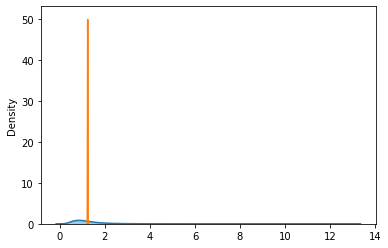

In [10]:
from scipy.stats import f
import seaborn as sns
dfn, dfd = 45, 10
r = f.rvs(dfn, dfd, size=10000)
sns.distplot(r)
import numpy as np 
sample_mean = []
for n in range(1,1001):
   s = np.random.choice(r,size=10000).mean()
   sample_mean.append(s)
sns.distplot(sample_mean)    

In [74]:
# 第六章 连接
import numpy as np 
import pandas as pd 
df1 = pd.DataFrame({'Name':['zhang san','li si'],'Age':[20,30]})
df2 = pd.DataFrame({'Name':['li si','wang wu'],'Gender':['F','M']})
df1.merge(df2,on='Name',how='left')
# 如果两个表中想要连接的列不具备相同的列名，可以通过 left_on 和 right_on 指定：
df1 = pd.DataFrame({'df1_Name':['zhang san','li si'],'Age':[20,30]})
df2 = pd.DataFrame({'df2_Name':['li si','wang wu'],'Gender':['F','M']})
df1.merge(df2,left_on='df1_Name',right_on='df2_Name',how='left')
# 如果两个表中的列出现了重复的列名，那么可以通过 suffixes 参数指定。例如合并考试成绩的时候，第一个表记录了语文成绩，第二个是数学成绩：
df1 = pd.DataFrame({'Name':['San Zhang'],'Grade':[70]})
df2 = pd.DataFrame({'Name':['San zhang'],'Grade':[80]}) 
df2 = pd.DataFrame({'Name':['San Zhang'],'Grade':[80]})
df1.merge(df2,on='Name',how='left',suffixes=['_chinese','_math'])
# df1.merge(df2,on='Name',how='left',suffixes=['_Chinese','_Math'])
# 在某些时候出现重复元素是麻烦的，例如两位同学来自不同的班级，但是姓名相同，这种时候就要指定 on 参数为多个列使得正确连接/
df1 = pd.DataFrame({'Name':['San Zhang', 'San Zhang'],'Age':[20, 21],'Class':['one', 'two']})
df2 = pd.DataFrame({'Name':['San Zhang', 'San Zhang'],'Gender':['F', 'M'],'Class':['two', 'one']})
df1
df2
df1.merge(df2,on=['Name','Class'],how='left')
# df1.merge(df2,on='Name',how='left') 错误的连接
# 3. 索引连接¶
# 所谓索引连接，就是把索引当作键，因此这和值连接本质上没有区别， pandas 中利用 join 函数来处理索引连接，它的参数选择要少于 merge ，除了必须的 on 和 how 之外，可以对重复的列指定左右后缀 lsuffix 和 rsuffix 。其中， on 参数指索引名，单层索引时省略参数表示按照当前索引连接。
df1 = pd.DataFrame({'Age':[20,30]},index=pd.Series(['San Zhang','Si Li'],name='Name'))
df2 = pd.DataFrame({'Gender':['F','M']},index=pd.Series(['Si Li','Wu Wang'],name='Name'))
df2
df1.join(df2,how='left')
df1 = pd.DataFrame({'Grade':[70]},index=pd.Series(['San Zhang'],name='Name'))
df2 = pd.DataFrame({'Grade':[80]},index=pd.Series(['San Zhang'],name='Name'))
df1.join(df2,how='left',lsuffix='_chinese',rsuffix='_math')
df1 = pd.DataFrame({'Age':[20,21]},index=pd.MultiIndex.from_arrays([['San Zhang', 'San Zhang'],['one', 'two']],names=('Name','Class')))
df2 = pd.DataFrame({'Gender':['F', 'M']},  index=pd.MultiIndex.from_arrays([['San Zhang', 'San Zhang'],['two', 'one']],names=('Name','Class')))
df1.join(df2)
# 如果想要进行类似于 merge 中以多列为键的操作的时候， join 需要使用多级索引，例如在 merge 中的最后一个例子可以如下写出：
df1 = pd.DataFrame({'Age':[20,21]},index=pd.MultiIndex.from_arrays([['San Zhang', 'San Zhang'],['one', 'two']],names=('Name','Class')))
df2 = pd.DataFrame({'Gender':['F', 'M']},index=pd.MultiIndex.from_arrays([['San Zhang', 'San Zhang'],['two', 'one']],names=('Name','Class')))
df2
# 二、连接方向
# 1. concat
# 前面介绍了关系型连接，其中最重要的参数是 on 和 how ，但有时候用户并不关心以哪一列为键来合并，只是希望把两个表或者多个表按照纵向或者横向拼接，为这种需求， pandas 中提供了 concat 函数来实现。

# 在 concat 中，最常用的有三个参数，它们是 axis, join, keys ，分别表示拼接方向，连接形式，以及在新表中指示来自于哪一张旧表的名字。这里需要特别注意， join 和 keys 与之前提到的 join 函数和键的概念没有任何关系。

# 在默认状态下的 axis=0 ，表示纵向拼接多个表，常常用于多个样本的拼接；而 axis=1 表示横向拼接多个表，常用于多个字段或特征的拼接。

# 例如，纵向合并各表中人的信息：
df1 = pd.DataFrame({'Name':['San Zhang','Si Li'],'Age':[20,30]})
df2 = pd.DataFrame({'Name':['Wu Wang'], 'Age':[40]})
pd.concat([df1,df2])

# 横向合并各表中的字段：
df2 = pd.DataFrame({'Grade':[80, 90]})
df3 = pd.DataFrame({'Gender':['M', 'F']})
pd.concat([df1,df2],1)

# 虽然说 concat 不是处理关系型合并的函数，但是它仍然是关于索引进行连接的。纵向拼接会根据列索引对其，默认状态下 join=outer ，表示保留所有的列，并将不存在的值设为缺失； join=inner ，表示保留两个表都出现过的列。横向拼接则根据行索引对齐， join 参数可以类似设置。
df2 = pd.DataFrame({'Name':['Wu Wang'], 'Gender':['M']})
pd.concat([df1,df2])
df2 = pd.DataFrame({'Grade':[80, 90]}, index=[1, 2])
pd.concat([df1,df2],1)
pd.concat([df1,df2],axis=1,join='inner')
# 因此，当确认要使用多表直接的方向合并时，尤其是横向的合并，可以先用 reset_index 方法恢复默认整数索引再进行合并，防止出现由索引的误对齐和重复索引的笛卡尔积带来的错误结果。

# 最后， keys 参数的使用场景在于多个表合并后，用户仍然想要知道新表中的数据来自于哪个原表，这时可以通过 keys 参数产生多级索引进行标记。例如，第一个表中都是一班的同学，而第二个表中都是二班的同学，可以使用如下方式合并：
df1 = pd.DataFrame({'Name':['San Zhang','Si Li'],'Age':[20,21]})
df2 = pd.DataFrame({'Name':['Wu Wang'],'Age':[21]})
pd.concat([df1,df2],keys=['one','two'])
# 三、类连接操作
# 除了上述介绍的若干连接函数之外， pandas 中还设计了一些函数能够对两个表进行某些操作，这里把它们统称为类连接操作。
# 1. 比较
# compare 是在 1.1.0 后引入的新函数，它能够比较两个表或者序列的不同处并将其汇总展示：
df1 = pd.DataFrame({'Name':['San Zhang', 'Si Li', 'Wu Wang'],'Age':[20, 21 ,21],'Class':['one', 'two', 'three']})
df2 = pd.DataFrame({'Name':['San Zhang', 'Li Si', 'Wu Wang'],'Age':[20, 22 ,21],'Class':['one', 'two', 'Three']})
df1.compare(df2)
# 结果中返回了不同值所在的行列，如果相同则会被填充为缺失值 NaN ，其中 other 和 self 分别指代传入的参数表和被调用的表自身。

# 如果想要完整显示表中所有元素的比较情况，可以设置 keep_shape=True ：
df1.compare(df2,keep_shape=True)
# 2. 组合
# combine 函数能够让两张表按照一定的规则进行组合，在进行规则比较时会自动进行列索引的对齐。对于传入的函数而言，每一次操作中输入的参数是来自两个表的同名 Series ，依次传入的列是两个表列名的并集，例如下面这个例子会依次传入 A,B,C,D 四组序列，每组为左右表的两个序列。同时，进行 A 列比较的时候， s2 指代的就是一个全空的序列，因为它在被调用的表中并不存在，并且来自第一个表的序列索引会被 reindex 成两个索引的并集。具体的过程可以通过在传入的函数中插入适当的 print 方法查看。

# 下面的例子表示选出对应索引位置较小的元素
df1.columns

Index(['Name', 'Age', 'Class'], dtype='object')